### Why this project?

Learn data cleaning with Pandas.

Use NumPy for mean, median, mode calculations.

Visualize trends using Matplotlib & Seaborn.

Understand the relationship between features (like Age, Gender, BMI) and Hypertension


## Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [19]:
# Load hypertension dataset
df = pd.read_csv('hypertension_dataset.csv')

# View top rows
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [20]:
# Basic info about dataset
df.info()

# Check summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


## Explore the data

In [22]:
# Check for null values
print(df.isnull().sum())

# Unique values in each column
for col in df.columns:
    print(f"{col} → {df[col].unique()[:10]}")


Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64
Age → [69 32 78 38 41 20 39 70 19 47]
Salt_Intake → [ 8.  11.7  9.5 10.   9.8 10.8  8.9  5.9  9.3  7.2]
Stress_Score → [ 9 10  3  1  0  7  5  8  6  4]
BP_History → ['Normal' 'Hypertension' 'Prehypertension']
Sleep_Duration → [6.4 5.4 7.1 4.2 5.8 5.2 7.8 7.2 4.7 6.2]
BMI → [25.8 23.4 18.7 22.1 16.2 21.9 27.6 36.5 24.3 24. ]
Medication → [nan 'ACE Inhibitor' 'Other' 'Beta Blocker' 'Diuretic']
Family_History → ['Yes' 'No']
Exercise_Level → ['Low' 'Moderate' 'High']
Smoking_Status → ['Non-Smoker' 'Smoker']
Has_Hypertension → ['Yes' 'No']


## Data Cleaning

In [24]:
# Check column names
print(df.columns)

# Fill missing numeric values
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert categorical columns (only if they exist)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].astype('category')
if 'Smoking' in df.columns:
    df['Smoking'] = df['Smoking'].astype('category')

# Double-check
print(df.info())



Index(['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration',
       'BMI', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
None


## Analysis with Pandas & Numpy

In [43]:
# NumPy calculations for Age
mean_age = np.mean(df['Age'])
median_age = np.median(df['Age'])

# Average Stress_Score for hypertensive vs non-hypertensive
avg_stress_hyp = df[df['Has_Hypertension'] == 'Yes']['Stress_Score'].mean()
avg_stress_non = df[df['Has_Hypertension'] == 'No']['Stress_Score'].mean()

# Hypertension rate by Smoking_Status
# Count of 'Yes' / total
smoking_counts = df.groupby('Smoking_Status')['Has_Hypertension'].value_counts(normalize=True).unstack()
print("Hypertension Rate by Smoking Status:\n", smoking_counts.get('Yes', pd.Series()))

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Avg Stress Score (Hypertensive):", avg_stress_hyp)
print("Avg Stress Score (Non-Hypertensive):", avg_stress_non)


Hypertension Rate by Smoking Status:
 Series([], dtype: object)
Mean Age: 50.34105793450882
Median Age: 50.0
Avg Stress Score (Hypertensive): nan
Avg Stress Score (Non-Hypertensive): nan


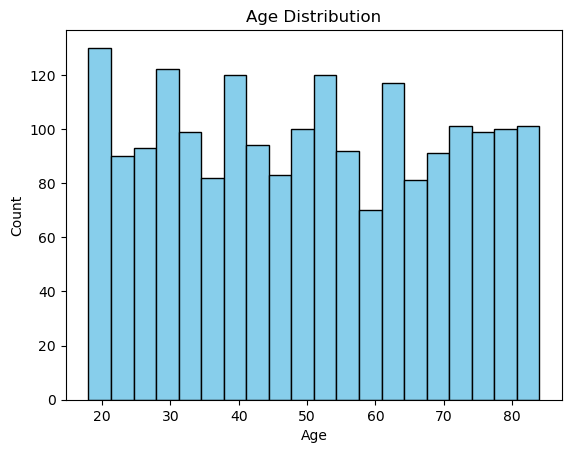

KeyError: 'BloodPressure'

In [44]:
# Age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Blood Pressure distribution
plt.hist(df['BloodPressure'], bins=20, color='salmon', edgecolor='black')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()


In [45]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Hypertension count
sns.countplot(x='Hypertension', data=df)
plt.title('Hypertension Count')
plt.show()

# Scatter plot Age vs BP
sns.scatterplot(x='Age', y='BloodPressure', hue='Hypertension', data=df)
plt.title('Age vs Blood Pressure')
plt.show()

# BMI vs Hypertension (boxplot)
sns.boxplot(x='Hypertension', y='BMI', data=df)
plt.title('BMI by Hypertension Status')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.